In [1]:
# 1. 기본 라이브러리 불러오기
import cv2 # computer vision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
# 2. CalcHistogram(img,num_bin)를 정의하기
def CalcHistogram(img,num_bin):
    h,w = img.shape
    hist = np.zeros(num_bin) # 2^bit bit=8 -> bit=3
    for i in range(0,h):
        for j in range(0,w):
            hist[img[i,j]] += 1
    return hist

In [6]:
# 3. ‘Lenna. png’를 흑백영상으로 읽은 후 영상의 크기를 자동으로 구하기
img = cv2.imread("images/Lenna.png", cv2.IMREAD_GRAYSCALE)
# img = np.array([[2,4,4,3],[2,1,3,3],[1,0,1,2],[0,1,1,2]])
h,w = img.shape
N = h*w
print(N)

48400


In [43]:
# (1단계) 입력 영상의 히스토그램 생성하기
bit = 8
num_bin = 2**bit
I_max = 2**bit -1
hist = CalcHistogram(img,num_bin)

In [44]:
# (2단계) 히스토그램 누적합 생성
# np.cumsum : cumulative sum
# hist_sum = np.zeros(num_bin)
# for i in range(0, num_bin-):
#     for j in range(0, i):
#         hist_sum[i] += hist[j]

hist_sum = np.cumsum(hist)
print(hist)
print(hist_sum)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.700e+01 0.000e+00 0.000e+00
 0.000e+00 9.200e+01 0.000e+00 0.000e+00 2.020e+02 0.000e+00 0.000e+00
 0.000e+00 3.140e+02 0.000e+00 0.000e+00 5.480e+02 0.000e+00 0.000e+00
 9.410e+02 0.000e+00 0.000e+00 1.279e+03 0.000e+00 1.019e+03 0.000e+00
 0.000e+00 9.300e+02 0.000e+00 8.470e+02 0.000e+00 5.780e+02 0.000e+00
 4.670e+02 0.000e+00 4.000e+02 0.000e+00 3.590e+02 0.000e+00 2.950e+02
 0.000e+00 2.810e+02 0.000e+00 2.930e+02 0.000e+00 2.640e+02 0.000e+00
 2.670e+02 2.710e+02 0.000e+00 2.920e+02 0.000e+00 2.900e+02 2.850e+02
 0.000e+00 2.910e+02 3.000e+02 0.000e+00 2.670e+02 2.360e+02 0.000e+00
 2.600

In [45]:
# (3단계) 히스토그램 누적합 정규화 - 반올림
hist_sum_norm = np.round(hist_sum/N*I_max)
print(hist_sum_norm)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   1.   1.   2.   2.   2.   2.   3.   3.   3.   6.   6.   6.
  11.  11.  11.  18.  18.  23.  23.  23.  28.  28.  33.  33.  36.  36.
  38.  38.  40.  40.  42.  42.  44.  44.  45.  45.  47.  47.  48.  48.
  50.  51.  51.  52.  52.  54.  56.  56.  57.  59.  59.  60.  61.  61.
  63.  64.  64.  65.  67.  68.  68.  70.  72.  73.  73.  75.  77.  79.
  82.  82.  85.  88.  90.  92.  94.  96.  97.  97.  99. 100. 101. 103.
 104. 106. 107. 109. 111. 112. 114. 116. 118. 120. 122. 124. 126. 129.
 131. 134. 137. 139. 143. 145. 147. 149. 150. 153. 155. 159. 162. 164.
 167. 169. 174. 176. 178. 180. 185. 187. 189. 192. 196. 197. 199. 202.
 203. 204. 206. 207. 208. 210. 211. 213. 214. 215. 217. 218. 220. 221.
 223. 224. 225. 226. 227. 227. 228. 229. 230. 230. 231. 232. 233. 234.
 234. 

In [46]:
# (4단계) 히스토그램 평활화 결과 생성
result = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        result[i,j] = hist_sum_norm[img[i,j]]
result = np.uint8(result)
hist1 = CalcHistogram(result,num_bin)
print(img)
print(result)

[[168 168 167 ... 171 177 154]
 [168 167 167 ... 174 182 158]
 [169 166 167 ... 150 132  99]
 ...
 [ 59  61  64 ...  82  98 102]
 [ 56  61  61 ...  95 110 111]
 [ 53  61  59 ... 106 116 118]]
[[203 203 202 ... 207 215 167]
 [203 202 202 ... 211 223 178]
 [204 199 202 ... 155 114  64]
 ...
 [ 18  23  28 ...  48  63  67]
 [ 11  23  23 ...  60  77  79]
 [  6  23  18 ...  72  90  94]]


<BarContainer object of 256 artists>

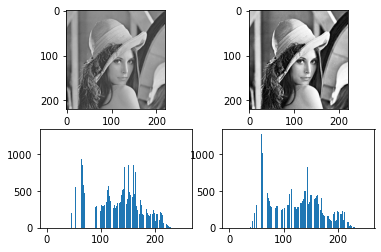

In [48]:
# 6. matplotlib.pyplot을 이용하여 결과 히스토그램을 출력하기
plt.subplot(2,2,1); plt.imshow(img, cmap='gray', norm=NoNorm())
plt.subplot(2,2,2); plt.imshow(result, cmap='gray', norm=NoNorm())
plt.subplot(2,2,3); plt.bar(range(0,num_bin), hist)
plt.subplot(2,2,4); plt.bar(range(0,num_bin), hist)